      Sales  Rating
0  548.9715     9.1
1   80.2200     9.6
2  340.5255     7.4
3  489.0480     8.4
4  634.3785     5.3
Alpha Beta
1.0343378458769883 2.912435546737946
1293580.88
Gasto luz: 
1015891200.0
N1: 
720.3315657667412
N2: 
-720.3315658599832
Porcentaje de probabilidad de éxito: 
0.004502072286042132
Sección de Ratings


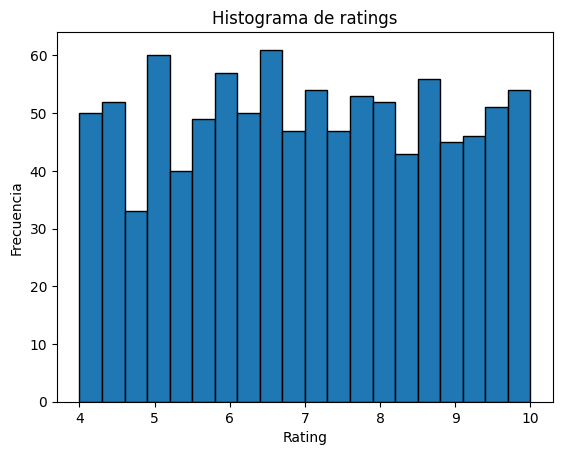

Alpha Beta
0.8923738272226862 0.9934875526087485


<ipython-input-25-2ce094329c6a>:120: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'r-',label="Beta ajustado",color="purple")


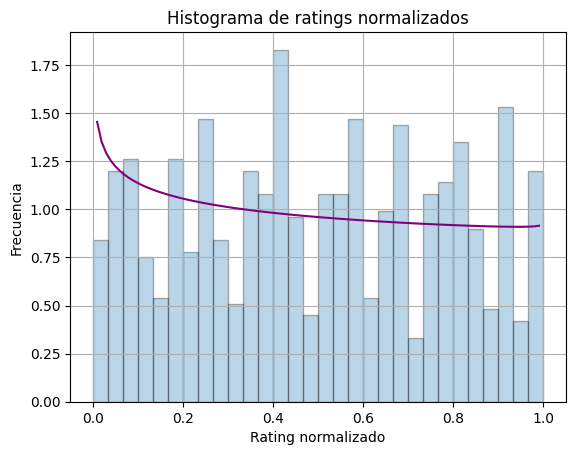

Media: 
6.839149802099823
Desviación estándar: 
1.7634306205368828
Probabilidad de éxito: 
0.17314008309421802


In [25]:
#Librerías relevantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

#Sección de pronóstico de ingreso
df=pd.read_csv("/content/SuperMarketData.csv")
print(df.head())

sales=np.array(df["Sales"])*19.88

max_sales=max(sales)
min_sales=min(sales)
sales_norm=1/(max_sales-min_sales)*(sales-min_sales)

a,b,_,_=beta.fit(sales)
print("Alpha","Beta")
print(a,b)

mu_norm= a/(a+b)
var_norm=(a*b)/((a+b)**2*(a+b+1))
desv_norm=np.sqrt(var_norm)

mu=(max_sales-min_sales)*mu_norm+min_sales
var=(max_sales-min_sales)**2*var_norm
sigma=np.sqrt(var)

#-------Salarios--------
#--Cajeros--
sal_cajeros=258.25
num_cajeros=30
dias_t=24

tot_sal_caj=(sal_cajeros*num_cajeros*dias_t)

#--Conserjes--
sal_conserje=5000
num_conserjes=20

tot_sal_cons=(sal_conserje*num_conserjes)

#---Conserje general
gerente =100000

#--Subgerentes--
sub_gerente=45000
num_sub_gerentes=4

tot_sub_ger=(sub_gerente*num_sub_gerentes)

fact=1.15       #Factor de ingreso de aumento para salarios bajos
#--Almacenistas
sal_almacenista=262.12
num_almacenistas=40
tot_sal_alm=(sal_almacenista*num_almacenistas*dias_t*fact)

#--Mostrador--
sal_g_pasillo=264.65
num_g_pasillos=60
tot_sal_most=(sal_g_pasillo*num_g_pasillos*dias_t*fact)

#--Nomina total--
nomina_tot=(tot_sal_caj+tot_sal_cons+gerente+tot_sub_ger+tot_sal_alm+tot_sal_most)
print(nomina_tot)

#--Luz--
gasto_luz=120*2000*24*5.879*30      #120(kW/Hr)/(m^2) * 2000 m^2 * 24 horas * 5.879 (Cuota por kW/h para alto consumo región central de Mex en Octubre 2024)
                                    # * 30 días

print("Gasto luz: ")
print(gasto_luz)

gastos_tot=gasto_luz+nomina_tot
ingreso=gastos_tot+1500000

omega=norm.ppf(0.01)
a_=mu**2
b_=-2*mu*gastos_tot-omega**2*sigma**2
c_=gastos_tot**2
N1=(-b+np.sqrt(b_**2-4*a_*c_))/(2*a_)
N2=(-b-np.sqrt(b_**2-4*a_*c_))/(2*a_)

print("N1: ")
print(N1)
print("N2: ")
print(N2)

if(ingreso/N1-mu>0):
    N=N1
else:
    N=N2

porc_pob=N1/160000
print("Porcentaje de probabilidad de éxito: ")
print(porc_pob)

#Ratings

print("Sección de Ratings")
ratings=np.array(df["Rating"])

plt.hist(ratings,bins=20,edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.title("Histograma de ratings")
plt.show()

a,b,_,_=beta.fit(ratings)
print("Alpha","Beta")
print(a,b)

max_rating=max(ratings)
min_rating=min(ratings)
ratings_norm=1/(max_rating-min_rating)*(ratings-min_rating)

plt.hist(ratings_norm,bins=30,density=True, alpha=0.3 ,edgecolor="black")
x=np.linspace(0,1,100)
y=beta.pdf(x,a,b)
plt.plot(x,y,'r-',label="Beta ajustado",color="purple")
plt.xlabel("Rating normalizado")
plt.ylabel("Frecuencia")
plt.title("Histograma de ratings normalizados")
plt.grid(True)
plt.show()

mu_norm= a/(a+b)
var_norm=(a*b)/((a+b)**2*(a+b+1))
desv_norm=np.sqrt(var_norm)

mu=(max_rating-min_rating)*mu_norm+min_rating
var=(max_rating-min_rating)**2*var_norm
sigma=np.sqrt(var)

print("Media: ")
print(mu)
print("Desviación estándar: ")
print(sigma)
prob_ratings = 1 - norm.cdf(8.5, mu, sigma)
print("Probabilidad de éxito: ")
print(prob_ratings)









**Notas sección de Ingreso Esperado:**

Dentro de esta primera sección se busca que por medio de datos de ventas registradas en supermercados locales, planteemos un escenario hipotético de crear un supermercado en el que se busca obtener $1,500,000 de ganancia después de gastos fijos. Para llegar a estas concluciones se busca, por medio de una normalización de datos para una distribución Beta, obtener constantes alpha y beta que nos ayuden a normalizar nuestros datos para posteriormente, por medio del Teorema del Límite Central, encontrar a cuantas personas tendríamos que convencer que compren mensualmente para obtener esta ganancia. Este resultado es el valor de N1, el cual nos indica que tendríamos que convencer a 720 personas que compren en el supermercado mensualmente, asumiendo que ya hay consecuencia local y que estas setecientas veinte pesonas compran una vez al mes. Sin embargo, aunque parece es una meta no tan compleja, la probabilidad de éxito de este suceso es batante baja siendo 0.4%, por lo tanto no es óptimo buscar emprender en este supermercado.

Cabe reclacar que los costos fijos estan implementados lo más reales posibles con datos actuales, esto debido a que el costo que más aporta a los costos del supermercado es la luz (por encima de los mil millones de pesos). Esto asumiendo que el supermercado se mantiene encendido por 24 horas, 30 días de un mes con el supermercado teniendo una extensión de 2000m^2, asumiendo que consume 120(kW/hr)/(m^2) y el costo actual en Octubre de 2024 para Tarifas de Alto Consumo por (kW/hr) por la CFE es de $5.879. De este modo, contando los salarios y el gasto fijo significativo de la luz, se concluye que el modelo no es óptimo para nuestra hipóstesis con la certeza de 99%, sería preferible optar por una meta de ganania más baja o buscar una localidad en la cual el número de clientes leales y consistentes sea mayor, aunado al hecho de que haya menor competencia, para así asegurar más ganancia.  


**Notas sección de ratings:**

*Visualización de ratings*

Dentro del gráfico del histograma inicialmente se puede observar que los ratings obtenidos no tienden a una distribución específica en general, esto es notorio porque los valores más bajos y más altos de ratings siendo aproximadamente 4 y 10 aparecen con una frecuencia similar en el volumen de datos así como lo aparecen los datos centrales como lo son el 6 y 7. Al observar que no es una campana, su distribución no es Gaussiana.

Posteriormente, al detallar más la evaluación visual del gráfico se puede observar una cierta continuidad en los múltiples rangos de valores entre el 1-10, lo cual supone que la distribución de estos datos más adecuada para definir estos ratings es una uniforme para variables aleatorias continuas.

Asimismo, se ejecuta un segundo histograma con valores normalizados, el cual nos ayuda a visualizar estos rangos de valores continuos uniformes.



*Probabilidad de apertura en base a rating esperado*

Inciando con la visualización de un histograma con los valores de los ratings normalizados, nos podemos percatar que aún normalizados, no tienden a una normal estándar con forma de campana, por ello, los valores se introducen dentro de una distribución Beta (véase línea morada en histograma 2) la cual intenta definir y reorganizar, con los valores de alpha (α) y beta (β), la distribución más adecuada para los valores.

Ahora, ya con los valores normalizados y los valores de alpha y beta, buscamos los valores para nuestra media y desviación estándar por medio de un despeje de la fórmula de distribución beta, de este modo con nuestra media mu (μ) y con nuestra desviacón estándar (σ) podremos realizar un análiis probabilístico del Teorema del Límite Central con norm.cdf incluido en scipy.stats --> norm.

Al final del análisis se obtiene que la probabilidad de que el promedio de los ratings sea mayor a 8.5 es del 17.31% por lo tanto se puede asumir que los ratings tienen una influencia en el trato recibido pues no son valores arbitrarios (50%), por lo tanto, la recomendación general para el departamento de Atención a Clientes sería mantener un trato digno geniuino constante para poder tener ratings superiores a los 8.5 y tener metas constantes de mejora de estos ratings para subir el promedio actual de 6.9 a un 8.5. Sin embargo, vale la pena recalcaar que los ratings, al ser una opinión del cliente, son completamente variables dependiendo de la situación, por lo tanto, aunque si tiene que haber un enfoque en mejorarlos, las métricas para los empleados con respecto a los ratings tendrían que ser bonos por mejor desempeño y no penalizaciones o condiciones a cumplir del sueldo fijo pues al un parámetro variable no sería justo considerarlo como una métrica de evaluación del personal que labora en el supermercado.


**REFERENCIAS**

* (2018). App.cfe.mx. https://app.cfe.mx/Aplicaciones/CCFE/Tarifas/TarifasCRECasa/Tarifas/TarifaDAC.aspx

* Enlight. (2022, October 19). Importancia del consumo energético en los costos del retail. Enlight.mx; Enlight. https://www.enlight.mx/blog/importancia-del-consumo-energetico-en-los-costos-del-retail#:~:text=El%20promedio%20de%20consumo%20anual,de%20su%20consumo%20total%20anual.

